In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [4]:
datas = []
total_len = 0
for folder in os.listdir('./'):
    if 'sber' in folder:
        for file in os.listdir(folder):
            df = pd.read_csv(os.path.join(folder, file))
            df.dropna(axis=0, inplace=True)
            df.reset_index(drop=True, inplace=True)
            user_item_count = df.groupby(['user_id', 'product_id'], as_index=False)['quantity'].count()
            total_len += user_item_count.shape[0]
            datas.append(user_item_count)
df = pd.concat(datas)
assert total_len == df.shape[0]

In [5]:
dff = df.groupby(['user_id', 'product_id'], as_index=False)['quantity'].sum()
top_products = df.groupby('product_id')['quantity'].sum().sort_values(ascending=False)

In [6]:
products_df = top_products.to_frame().reset_index()

In [7]:
list(top_products[:3].index)

[709, 39590, 166]

In [8]:
dff['pairs'] = tuple(zip(dff['quantity'], dff['product_id']))

In [9]:
ad = dff.groupby('user_id')['pairs'].apply(list).to_frame()

In [10]:
ad['pairs'] = ad['pairs'].apply(lambda v: sorted(v, reverse=True))
ad['len'] = ad['pairs'].apply(len)

In [11]:
ad.reset_index(inplace=True)

In [13]:
ad.shape

(657069, 3)

In [1]:
def advice(idx):
    l = 0 #min(ad.loc[idx, 'len'], 15)
    res = [v[1] for v in ad.loc[idx, 'pairs'][:l]]
    a = list(top_products[:50 - l].index)
    b = a[:10]
    c = a[10:]
    np.random.shuffle(b)
    res += b + c
    return ' '.join(map(str, res))

In [2]:
advice(0)

NameError: name 'ad' is not defined

In [59]:
submission = pd.read_csv('sample_submission.csv')
submission['Predicted'] = submission.index
submission['Predicted'] = submission['Predicted'].apply(advice)

In [60]:
submission.head()

,Id,Predicted
0,51,709 39590 166 55133 3497419 1300 67694 55134 5...
1,65,709 39590 166 55133 3497419 1300 67694 55134 5...
2,766,709 39590 166 55133 3497419 1300 67694 55134 5...
3,1132,709 39590 166 55133 3497419 1300 67694 55134 5...
4,1578,709 39590 166 55133 3497419 1300 67694 55134 5...


In [61]:
submission.to_csv('dummy_submit_popular.csv', index=False)

# Matrix

In [ ]:
m = np.empty((submission.shape[0], products_df.shape[0]))
m[:] = np.nan

In [ ]:
m.shape

# Помойка

In [55]:
products.sort_values(ascending=False)

product_id
0          612677
709        368956
39590      112981
166         98763
55133       96574
            ...  
5575829         1
5575797         1
7387411         1
7387426         1
67953           1
Name: quantity, Length: 95002, dtype: int64

In [84]:
df['B'] = datas[1]['quantity']

In [ ]:
products = list(set(dff['product_iduct_id']))

In [88]:
df['B'].loc[51][:25]

product_id
0        NaN
159      NaN
661      NaN
687      NaN
709      1.0
1552     NaN
1989     NaN
2271     NaN
2325     NaN
4642     NaN
5160     NaN
5501     NaN
5509     NaN
6300     NaN
6390     NaN
6758     NaN
9908     NaN
9959     NaN
15145    NaN
16219    NaN
17314    NaN
18450    NaN
20567    NaN
21663    NaN
21664    NaN
Name: B, dtype: float64

In [10]:
df1 = pd.read_csv('sbermarket_tab_2_1/tab_2_products_2020-01-21.csv')
df1.dropna(axis=0, inplace=True)
df1.reset_index(drop=True).head()
df1[df1['product_id'] == 14863]

,user_id,order_id,line_item_id,price,quantity,discount,product_name,product_id,brand_name,master_category_id,parent_category_id
2208,8142,5255667,31156610,99.900002,42,0.000000,Вода питьевая минеральная Vittel негазированна...,14863,Vittel,77.0,74
7538,22018,5745983,32155079,161.000000,2,0.000000,Вода питьевая минеральная Vittel негазированна...,14863,Vittel,77.0,74
11905,35228,5388810,30964917,161.000000,18,0.000000,Вода питьевая минеральная Vittel негазированна...,14863,Vittel,77.0,74
19218,50024,5239645,30706575,161.000000,7,0.000000,Вода питьевая минеральная Vittel негазированна...,14863,Vittel,77.0,74
19223,50024,5815474,32029187,161.000000,8,0.000000,Вода питьевая минеральная Vittel негазированна...,14863,Vittel,77.0,74
24035,59936,5189977,31098560,161.000000,30,0.000000,Вода питьевая минеральная Vittel негазированна...,14863,Vittel,77.0,74
26813,65546,3952540,31152613,161.000000,18,0.000000,Вода питьевая минеральная Vittel негазированна...,14863,Vittel,77.0,74
29006,69459,4025196,30826644,161.000000,6,0.000000,Вода питьевая минеральная Vittel негазированна...,14863,Vittel,77.0,74
34699,83495,5736502,31537552,169.000000,18,0.000000,Вода питьевая минеральная Vittel негазированна...,14863,Vittel,77.0,74
37398,94910,5578387,32221159,161.000000,18,0.000000,Вода питьевая минеральная Vittel негазированна...,14863,Vittel,77.0,74


In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495835 entries, 0 to 513064
Data columns (total 11 columns):
user_id               495835 non-null int64
order_id              495835 non-null int64
line_item_id          495835 non-null int64
price                 495835 non-null float64
quantity              495835 non-null int64
discount              495835 non-null float64
product_name          495835 non-null object
product_id            495835 non-null int64
brand_name            495835 non-null object
master_category_id    495835 non-null float64
parent_category_id    495835 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 45.4+ MB


In [39]:
df1.shape

(513065, 11)

In [94]:
user_item_count1 = df1.groupby(['user_id', 'product_id'], as_index=False)['quantity'].count()

In [96]:
user_item_count1.shape

(490386, 3)

In [95]:
user_item_count2 = df1.groupby(['user_id', 'product_id'], as_index=False)['quantity'].count()

In [99]:
df2 = pd.concat([user_item_count1, user_item_count2])

In [69]:
df_products = pd.read_csv('kaggle_tab_1345/tab_5_product_properties.csv')

In [70]:
df_products.head()

,product_id,property_name,property_value
0,1,Вес,100 г
1,2,Вид,Молочный напиток
2,2,Вес,100 г
3,2,Вкус,Черника
4,2,Сырье,Натуральное молоко


In [ ]:
df2 = 

In [16]:
submission.shape

NameError: name 'submission' is not defined

In [73]:
df1[df1['product_id'] == 3599065]

,user_id,order_id,line_item_id,price,quantity,discount,product_name,product_id,brand_name,master_category_id,parent_category_id


In [52]:
user_item_sum = df1.groupby(['user_id', 'product_id'])['quantity'].sum().to_frame()

In [53]:
user_item_count = df1.groupby(['user_id', 'product_id'])['quantity'].count().to_frame()

In [54]:
user_purchases = df1['user_id'].value_counts().to_frame()

In [62]:
user_item_count.head()

quantity
user_id product_id          
51      0                  1
        456                1
        661                1
        7397               1
        7527               1

In [45]:
user_item_count.to_frame().max()

quantity    28
dtype: int64

In [35]:
user_item[(24 == user_item)]

user_id  product_id
903      2562          24
2073     2529          24
3011     0             24
3999     17655         24
         26133         24
                       ..
840314   2150          24
840955   2146          24
841651   2551          24
         2615          24
842473   2543          24
Name: quantity, Length: 906, dtype: int64

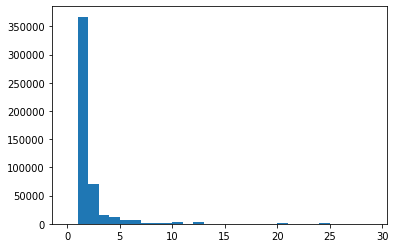

In [40]:
plt.hist(user_item[user_item < 1000], bins=np.arange(30));

In [20]:
df1[df1['product_id'] == 5481337]

,user_id,order_id,line_item_id,price,quantity,discount,product_name,product_id,brand_name,master_category_id,parent_category_id
5924,18476,5576678,32215568,0.52,500,0.0,Сахар Rioba белый стики 5 г,5481337,Rioba,574.0,9
10038,28757,5321006,26871186,0.52,500,0.0,Сахар Rioba белый стики 5 г,5481337,Rioba,574.0,9
36368,91303,5837020,31996706,0.52,500,0.0,Сахар Rioba белый стики 5 г,5481337,Rioba,574.0,9
39100,98331,5425334,30832255,0.52,500,0.0,Сахар Rioba белый стики 5 г,5481337,Rioba,574.0,9
39791,99941,5722204,31517978,0.52,500,0.0,Сахар Rioba белый стики 5 г,5481337,Rioba,574.0,9
39792,99941,5722204,31518042,0.52,500,0.0,Сахар Rioba белый стики 5 г,5481337,Rioba,574.0,9
39793,99941,5722204,31518291,0.52,2500,0.0,Сахар Rioba белый стики 5 г,5481337,Rioba,574.0,9
48495,115805,5687759,30790658,0.52,500,0.0,Сахар Rioba белый стики 5 г,5481337,Rioba,574.0,9
53547,124593,5720039,31047730,0.52,500,0.0,Сахар Rioba белый стики 5 г,5481337,Rioba,574.0,9
53592,124593,5853420,32157643,0.52,1000,0.0,Сахар Rioba белый стики 5 г,5481337,Rioba,574.0,9
